In [2]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload

import poppy_roman_cgi_phasec as cgi
from poppy_roman_cgi_phasec import hlc
import misc
reload(hlc)

import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# cgi_dir = Path('C:/Users/Kian/Desktop/roman-cgi-phasec-data')
# cgi_dir = Path('/Users/kianmilani/Desktop/roman-cgi-phasec-data')
cgi_dir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data')


In [4]:
influence_func = fits.getdata('influence_dm5v2.fits')
wavelength_c = 575e-9*u.m
Nacts = 48
dm_diam = 46.3*u.mm
act_spacing = 0.9906*u.mm

dmdir = Path('C:/Users/Kian/Documents/data-files/dm-maps')
dm1_piston_fname = str(dmdir/'hlc_dm1_piston.fits')
dm2_piston_fname = str(dmdir/'hlc_dm2_piston.fits')

dm1 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM1', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func='proper_inf_func.fits')
dm1_piston_map = fits.getdata(dm1_piston_fname)
dm1.set_surface(dm1_piston_map)

dm2 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM2', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func='proper_inf_func.fits')
dm2_piston_map = fits.getdata(dm2_piston_fname)
dm2.set_surface(dm2_piston_map)

misc.display_dm(dm1)
misc.display_dm(dm2)

FileNotFoundError: [Errno 2] No such file or directory: 'influence_dm5v2.fits'

In [ ]:
reload(hlc)

pxscl = 13e-6*u.m/u.pixel

pxscl_lamD_ref = 1/2
lambda_ref = 0.5*u.micron
D = 2.36*u.m
as_per_lamD = (lambda_ref/D * u.radian).to(u.arcsec)
pxscl_as_ref = as_per_lamD * pxscl_lamD_ref
print(pxscl_lamD_ref, pxscl_as_ref)

pxscl_lamD = pxscl_lamD_ref*1/(575/500)
pxscl_as = pxscl_as_ref*1/(575/500)
print(pxscl_lamD, pxscl_as)

wavelengths = np.linspace(575e-9 - 575e-9*.10/2, 575e-9 + 575e-9*.10/2, 25)*u.m
# dm1s = ['hlc_dm1.fits', dm1]
# dm2s = ['hlc_dm2.fits', dm2]

psfs, wfs = hlc.run_multi(mode='HLC575',
                          wavelength=wavelengths,
#                           dm1 = 'hlc_dm1.fits', dm2='hlc_dm2.fits',
#                           dm1=dm1s, dm2=dm2s,
                          npsf=64, psf_pixelscale=pxscl,
                          cgi_dir=cgi_dir,
#                           use_fieldstop=False,
#                           return_intermediates=True,
                         )

0.5 0.021850085407531392 arcsec
0.4347826086956522 0.019000074267418603 arcsec
Propagating wavelength 560.625 nm.Propagating wavelength 589.375 nm.Propagating wavelength 603.750 nm.Propagating wavelength 598.958 nm.Propagating wavelength 586.979 nm.
Propagating wavelength 553.437 nm.


Propagating wavelength 558.229 nm.Propagating wavelength 551.042 nm.Propagating wavelength 601.354 nm.
Propagating wavelength 567.812 nm.Propagating wavelength 565.417 nm.Propagating wavelength 579.792 nm.
Propagating wavelength 594.167 nm.Propagating wavelength 591.771 nm.Propagating wavelength 577.396 nm.Propagating wavelength 563.021 nm.Propagating wavelength 596.562 nm.Propagating wavelength 548.646 nm.


Propagating wavelength 570.208 nm.


Propagating wavelength 572.604 nm.




Propagating wavelength 584.583 nm.Propagating wavelength 582.187 nm.Propagating wavelength 555.833 nm.Propagating wavelength 546.250 nm.



DEBUG:poppy:Trans: /groups/douglase/kians-data-files/roman-cgi-phasec-data/hlc/pupil

INFO:poppy:COMPLEX OCCULTER: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/hlc/hlc_fpm_trans_0.58937500um_real.fits
DEBUG:poppy:FixedSamplingImagePlaneElement COMPLEX OCCULTER initialized:centering style ADJUSTABLE, central wavelength for operation 5.75e-07 m, entrance pupil diameter of system 2.363114 m, pixelscale of 0.001340057497357116 arcsec/pix.
INFO:poppy:COMPLEX OCCULTER: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/hlc/hlc_fpm_trans_0.60375000um_real.fits
DEBUG:poppy:FixedSamplingImagePlaneElement COMPLEX OCCULTER initialized:centering style ADJUSTABLE, central wavelength for operation 5.75e-07 m, entrance pupil diameter of system 2.363114 m, pixelscale of 0.001340057497357116 arcsec/pix.
INFO:poppy:COMPLEX OCCULTER: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/hlc/hlc_fpm_trans_0.57020833um_real.fits
DEBUG:poppy:Trans: /groups/douglase/kians

DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP3, fl =1.22e+00 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP2, fl =5.79e-01 m
DEBUG:poppy:Initialized: Secondary, fl =-6.54e-01 m
DEBUG:poppy:FixedSamplingImagePlaneElement COMPLEX OCCULTER initialized:centering style ADJUSTABLE, central wavelength for operation 5.75e-07 m, entrance pupil diameter of system 2.363114 m, pixelscale of 0.001340057497357116 arcsec/pix.
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP7, fl =7.08e-01 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m
DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:In

DEBUG:poppy:Initialized: OAP1, fl =5.03e-01 m
DEBUG:poppy:Initialized: OAP8, fl =2.10e-01 m
INFO:poppy:Added optic: POMA Fold after separation: 2.99e+00 m 
INFO:poppy:Added optic: TT Fold after separation: 3.51e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: FOCM after separation: 7.68e-01 m 
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: LENS 1, fl =1.05e-01 m
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
DEBUG:poppy:Initialized: LENS 1, fl =1.05e-01 m
DEBUG:poppy:Initialized: LENS 1, fl =1.05e-01 m
DEBUG:poppy:Initialized: LENS 1, fl =1.05e-01 m
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: OAP1 after separation: 3.55e-01 m 
INFO:poppy:Added optic: OAP2 after separation: 3.15e-01 m 
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: LENS 1, fl =1.05e-01 m
DEBUG:poppy:Initialized: LENS 2, fl =

INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 3 after separation: 5.05e-01 m 
DEBUG:poppy:Initialized: LENS 2, fl =-1.71e-01 m
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: TT Fold after separation: 3.51e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP5 after separation: 4.09e-01 m 
INFO:poppy:Added optic: TT Fold after separation: 3.51e-01 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: DM1 Plane (No Optic) after separation: 7.76e-01 m 
INFO:poppy:Added optic: OAP6 after separation: 5.48e-01 m 
INFO:poppy:Added optic: OAP4 after separation: 1.16e+00 m 
INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 5.48e-01 m 
INFO:poppy:Added optic: OAP1 after separation: 3.55e

INFO:poppy:Added optic: SPM Plane (No Optic) after separation: 4.23e-01 m 
INFO:poppy:Added optic: SPM Plane (No Optic) after separation: 4.23e-01 m 
INFO:poppy:Added optic: Filter after separation: 3.68e-01 m 
INFO:poppy:Added optic: LENS 2 after separation: 3.04e-03 m 
INFO:poppy:Added optic: LENS 2 after separation: 3.04e-03 m 
INFO:poppy:Added detector with pixelscale=1.3e-05 m / pix and oversampling=1: Detector
INFO:poppy:Added optic: OAP5 after separation: 4.09e-01 m 
INFO:poppy:Added optic: OAP5 after separation: 4.09e-01 m 
INFO:poppy:Added optic: Fold 3 after separation: 5.05e-01 m 
INFO:poppy:Added optic: DM2 Plane (No Optic) after separation: 1.00e+00 m 
INFO:poppy:Added optic: OAP5 after separation: 4.09e-01 m 
INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP5 after separation: 4.09e-01 m 
INFO:poppy:Added optic: LENS 1 after separation: 2.14e-01 m 
INFO:poppy:Added detector: Detector after separation: 5.00e-02 m 
INFO:p

INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 5.48e-01 m 
INFO:poppy:Added optic: Fold 4 after separation: 2.02e-01 m 
INFO:poppy:Added optic: Filter after separation: 3.68e-01 m 
DEBUG:poppy:Padded WF array for oversampling by 3.303, to (1024, 1024).
INFO:poppy:Initialized OpticalSystem: HLC part 2
INFO:poppy:Added optic: LENS 2 after separation: 3.03e-03 m 
INFO:poppy:Added optic: LENS 1 after separation: 2.14e-01 m 
INFO:poppy:Added detector with pixelscale=1.3e-05 m / pix and oversampling=1: Detector
INFO:poppy:Added optic: Fold 4 after separation: 2.02e-01 m 
DEBUG:poppy:Padded WF array for oversampling by 3.303, to (1024, 1024).
INFO:poppy:Added optic: FPM Plane (No Optic) after separation: 0.00e+00 m 
INFO:poppy:Added detector: Detector after separation: 5.00e-02 m 
INFO:poppy:Added optic: LENS 2 after separation: 3.04e-03 m 
INFO:poppy:Added optic: OAP6 after separation: 5.48e-01 m 
INFO:poppy:Added optic: Lyot Stop after separation: 6.87e-01 m 
INFO:poppy:Adde

DEBUG:poppy:  Propagating wavefront to Pupil plane: Roman Pupil  after distance 0.0 m 
DEBUG:poppy:  Propagating wavefront to Pupil plane: Roman Pupil  after distance 0.0 m 
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 2.83827920690472 m after distance 0.0 m 
DEBUG:poppy:------ Applying Lens: Primary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.185e+00 m, z_w0=0.000e+00 m
z=0.000e+00 m, z_r=7.490e+06 m
DEBUG:poppy:  Beam radius at Primary =1.19e+00 m
DEBUG:poppy: input flat wavefront and Primary has output beam curvature of =-2.84e+00 m
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
DEBUG:poppy:Array shape (312, 312) is smaller than desired shape [1024, 1024]; will attempt to zero-pad the array
DEBUG:poppy:Primary has a curved output wavefront, with waist at 2.8382792069043123 m
DEBUG:poppy:Array shape (312, 312) is smaller than desired shape [1024, 1024]; will attempt to zero-pad the array
DEBUG:poppy:Array shape (312, 312) is smaller than desir

DEBUG:poppy: input flat wavefront and Primary has output beam curvature of =-2.84e+00 m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.185e+00 m, z_w0=0.000e+00 m
z=0.000e+00 m, z_r=8.011e+06 m
DEBUG:poppy:Set output beam focal length to 2.83827920690472 m
DEBUG:poppy: input flat wavefront and Primary has output beam curvature of =-2.84e+00 m
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
DEBUG:poppy: input flat wavefront and Primary has output beam curvature of =-2.84e+00 m
DEBUG:poppy:Array shape (312, 312) is smaller than desired shape [1024, 1024]; will attempt to zero-pad the array
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
INFO:poppy:Calculating PSF with 1 wavelengths
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
DEBUG:poppy:Primary has a curved output wavefront, with waist at 2.838279206904292 m
DEBUG:poppy:  Beam radius at Primary =1.19e+00 m

DEBUG:poppy:Applying spherical lens phase =4.65e-14 1 / m
DEBUG:poppy:Set output beam focal length to 2.83827920690472 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 2.8382792069043514 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy: input flat wavefront and Primary has output beam curvature of =-2.84e+00 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:Primary has a curvature of =-2.84e+00 m
DEBUG:poppy:  Starting Pixelscale: 0.0076476181229773454 m / pix
DEBUG:poppy:Primary has a curved output wavefront, with waist at 2.838279206904306 m
DEBUG:poppy:Post Optic Parameters:w_0:4.529e-07 m, z_w0=2.838e+00 m
z=0.000e+00 m, z_r=1.084e-06 m
DEBUG:poppy:Set output beam focal length to 2.83827920690472 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =2.26e+13 m
DEBUG:poppy:Applying spherical phase curvature =2.22e+13 m
DEBUG:poppy:Applying sph

DEBUG:poppy:Applying spherical lens phase =3.52e-01 1 / m
DEBUG:poppy:  Propagating wavefront to Lens: Secondary, with focal length -0.654200796568004 m after distance 2.285150508110035 m 
DEBUG:poppy:Spherical to Waist propagation, dz=2.838279206904364 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Applying spherical phase curvature =2.84e+00 m
DEBUG:poppy:  Intermediate Pixelscale: 2.1360955502715867e-07 m / pix
DEBUG:poppy:Applying spherical lens phase =3.52e-01 1 / m
DEBUG:poppy:Waist to Spherical propagation, dz=-0.5531286987942772 m
DEBUG:poppy:    FFT_2D: FFT in 0.019171 s, full function  in 0.022 s
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 2.838279206904306 m
DEBUG:poppy:    FFT_2D: FFT in 0.017708 s, full function  in 0.020 s
DEBUG:poppy:Applying spherical phase curvature =-5.53e-01 m
DEBUG:poppy:Applying spherical lens phase =-1.81e+00 1 / 

DEBUG:poppy:    FFT_2D: FFT in 0.014459 s, full function  in 0.017 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 2.29e+00 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:------ Applying Lens: Secondary ------
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 2.29e+00 m ------
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:4.419e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.058e-06 m
DEBUG:poppy:------ Applying Lens: Secondary ------
DEBUG:poppy:  Beam radius at Secondary =2.31e-01 m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:4.273e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.023e-06 m
DEBUG:poppy:spherical beam
DEBUG:poppy:  Beam radius at Secondary =2.31e-01 m
DEBUG:poppy:w_0:4.419e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.058e-06 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:4.273e-07 m, z_w0

DEBUG:poppy:Applying spherical phase curvature =3.11e+10 m
DEBUG:poppy:------ Applying Lens: Secondary ------
DEBUG:poppy:Output beam focal length is now 18.37108914311807 m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.8653397322169205 m
DEBUG:poppy:    FFT_2D: FFT in 0.018767 s, full function  in 0.022 s
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Applying spherical lens phase =3.21e-11 1 / m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Starting Pixelscale: 0.0014903808797062446 m / pix
DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:4.200e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.006e-06 m
DEBUG:poppy:Sphe

DEBUG:poppy:------ Optic: Secondary applied ------
DEBUG:poppy:Spherical to Waist propagation, dz=3.5801892241386644 m
DEBUG:poppy:Magnification: 6.472615202351668  from R_in = -0.5531286987942838 m, R_out = -3.5801892246728784 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Propagating wavefront to Optic: POMA Fold after distance 2.993753469304728 m 
DEBUG:poppy:Output beam focal length is now 18.371089143130128 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-1.8079e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.865339732286923 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary
DEBUG:poppy:------ Optic: Secondary applied ------
DEBUG:poppy:  Propagating wavefront to Optic: POMA Fold after distance 2.993753469304728 m 
DEBUG:poppy:

DEBUG:poppy:Secondary has a curved output wavefront, with waist at 5.8653397322088345 m
DEBUG:poppy:  Intermediate Pixelscale: 1.3376494464274193e-06 m / pix
DEBUG:poppy:Post Optic Parameters:w_0:2.931e-06 m, z_w0=5.865e+00 m
z=2.285e+00 m, z_r=4.543e-05 m
DEBUG:poppy:Magnification: 6.4726152023560015  from R_in = -0.553128698794271 m, R_out = -3.580189224675192 m
DEBUG:poppy:Output beam focal length is now 18.371089143142427 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-1.8079e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.027899 s, full function  in 0.030 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Applying spherical phase curvature =2.63e+10 m
DEBUG:poppy:  Intermediate Pixelscale: 1.2814456881877894e-06 m / pix
DEBUG:poppy:Applying spherical phase curvature =3.58e+00 m
DEBUG:poppy:Applying spheric

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Propagating wavefront to Lens: M3, with focal length 0.430216463069001 m after distance 1.680935841598811 m 
DEBUG:poppy:Waist to Spherical propagation, dz=-0.5864357547940715 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.8653397322169205 m
DEBUG:poppy:Applying spherical phase curvature =-5.86e-01 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:Applying spherical lens phase =-1.71e+00 1 / m
DEBUG:poppy:  Starting Pixelscale: 0.00024412470442851145 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.5864357548021575 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: POMA Fold
DEBUG:poppy:  Propagating wavefront to Lens: M3, with focal length 0.430216463069001 m after distance 1.680935841598811 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.865339732264198 m
DE

DEBUG:poppy:Applying spherical phase curvature =5.86e-01 m
DEBUG:poppy:Applying spherical lens phase =1.71e+00 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 5.28e+00 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 1.315167943131787e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=1.0945000867493757 m
DEBUG:poppy:Waist to Spherical propagation, dz=1.0945000867966534 m
DEBUG:poppy:    FFT_2D: FFT in 0.015234 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical phase curvature =1.09e+00 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 1.2814456881877894e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=1.0945000867266508 m
DEBUG:poppy:    FFT_2D: FFT in 0.016032 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical phase curvature =1.09e+00 m
DEBUG:poppy: 

DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 6.96e+00 m ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.718e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.213e-05 m
DEBUG:poppy:Applying spherical phase curvature =3.92e+08 m
DEBUG:poppy:------ Applying Lens: M3 ------
DEBUG:poppy:Applying spherical lens phase =2.55e-09 1 / m
DEBUG:poppy:  Beam radius at M3 =7.06e-02 m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.766e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.286e-05 m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 6.96e+00 m ------
DEBUG:poppy:spherical beam
DEBUG:poppy:  Beam radius at M3 =7.06e-02 m
DEBUG:poppy:Spherical to Waist propagation, dz=0.5864357547776251 m
DEBUG:poppy:------ Applying Lens: M3 ------
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:2.718e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.213e-05 m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.695e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.176e-05 m
DEB

DEBUG:poppy:Applying spherical lens phase =9.14e-01 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 6.96e+00 m ------
DEBUG:poppy:------ Applying Lens: M3 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.837e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.396e-05 m
DEBUG:poppy:  Beam radius at M3 =7.06e-02 m
DEBUG:poppy:Applying spherical phase curvature =1.09e+00 m
DEBUG:poppy:spherical beam
DEBUG:poppy:Applying spherical lens phase =9.14e-01 1 / m
DEBUG:poppy:w_0:2.837e-06 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.396e-05 m
DEBUG:poppy:Applying spherical lens phase =1.71e+00 1 / m
DEBUG:poppy: input curved wavefront and M3 has output beam curvature of =-7.09e-01 m
DEBUG:poppy:M3 has a curvature of =-7.09e-01 m
DEBUG:poppy:M3 has a curved output wavefront, with waist at 7.668681552494993 m
DEBUG:poppy:Post Optic Parameters:w_0:1.837e-06 m, z_w0=7.669e+00 m
z=6.960e+00 m, z_r=1.844e-05 m
DEBUG:poppy:Magnification: -0.6476397238589359  from R_in = 1.09

DEBUG:poppy:M3 has a curved output wavefront, with waist at 7.668681552471257 m
DEBUG:poppy:Post Optic Parameters:w_0:1.852e-06 m, z_w0=7.669e+00 m
z=6.960e+00 m, z_r=1.859e-05 m
DEBUG:poppy:Magnification: -0.6476397238399095  from R_in = 1.0945000867806316 m, R_out = -0.7088417339453652 m
DEBUG:poppy:Output beam focal length is now -11.897847099291257 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:Applying spherical phase curvature =7.09e-01 m
DEBUG:poppy:1/fl=2.3244e+00 1 / m
DEBUG:poppy:Applying spherical lens phase =1.41e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=9.1366e-01 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-1.4108e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Applying spherical phase curvature =4.05e+08 m
DEBUG:poppy:  Intermediate Pixelscale: 1.3713717013703182e-06 m / pix
DEBUG:poppy:Applying spherical lens phas

DEBUG:poppy:M3 has a curvature of =-7.09e-01 m
DEBUG:poppy:M3 has a curved output wavefront, with waist at 7.668681552349591 m
DEBUG:poppy:Post Optic Parameters:w_0:1.929e-06 m, z_w0=7.669e+00 m
z=6.960e+00 m, z_r=1.936e-05 m
DEBUG:poppy:    FFT_2D: FFT in 0.014752 s, full function  in 0.017 s
DEBUG:poppy:Magnification: -0.647639723742337  from R_in = 1.0945000868211858 m, R_out = -0.7088417338648366 m
DEBUG:poppy:Output beam focal length is now -11.897847097518547 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:  Starting Pixelscale: 0.00045562452151515426 m / pix
DEBUG:poppy:1/fl=2.3244e+00 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 7.90e+00 m ------
DEBUG:poppy:Spherical to Waist propagation, dz=0.7088417334576826 m
DEBUG:poppy:1.0/(R_input_beam)=9.1366e-01 1 / m
DEBUG:poppy:------ Applying Lens: M4 ------
DEBUG:poppy:using mkl_fft FFT of (

DEBUG:poppy:Applying spherical lens phase =1.41e+00 1 / m
DEBUG:poppy:M4 has a curvature of =-2.30e-01 m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-4.3417e+00 1 / m
DEBUG:poppy:M3 has a curvature of =-7.09e-01 m
DEBUG:poppy:M4 has a curved output wavefront, with waist at 8.13367868260759 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M4
DEBUG:poppy:M3 has a curved output wavefront, with waist at 7.668681552447318 m
DEBUG:poppy:Post Optic Parameters:w_0:1.728e-06 m, z_w0=8.134e+00 m
z=7.903e+00 m, z_r=1.702e-05 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 7.668681552587992 m
DEBUG:poppy:------ Optic: M4 applied ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Post Optic Parameters:w_0:1.868e-06 m, z_w0=7.669e+00 m
z=6.960e+00 m, z_r=1.875e-05 m
DEBUG:poppy:Magnification: -0.9814682559279694  from R_in = 0.2346730157617687 m, R_out = -0.23032411549305998 m
DEBUG:poppy:Magnification: -0.647639723820712  from R_in = 1.09450008678

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 7.668681552447318 m
DEBUG:poppy:  Starting Pixelscale: 0.00015084154275718235 m / pix
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.23032411354643134 m
DEBUG:poppy:  Starting Pixelscale: 0.00045562452151948636 m / pix
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Spherical to Waist propagation, dz=0.7088417334337445 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 8.808748320585204e-07 m / pix
DEBUG:poppy: input curved wavefront and M4 has output beam curvature of =-2.30e-01 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M4
DEBUG:poppy:Waist to Spherical propagation, dz=0.23467301590126155 m
DEBUG:poppy:------ Optic: M4 applied ------
DEBUG:poppy:  Propagat

DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.898e-06 m, z_w0=7.669e+00 m
z=7.903e+00 m, z_r=1.905e-05 m
DEBUG:poppy:1.0/(R_input_beam)=4.2612e+00 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.018676 s, full function  in 0.021 s
DEBUG:poppy:  Beam radius at M4 =2.34e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:1.898e-06 m, z_w0=7.669e+00 m
z=7.903e+00 m, z_r=1.905e-05 m
DEBUG:poppy: input curved wavefront and M4 has output beam curvature of =-2.30e-01 m
DEBUG:poppy:M4 has a curvature of =-2.30e-01 m
DEBUG:poppy:M4 has a curved output wavefront, with waist at 8.133678681990403 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 8.133678682474452 m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 7.90e+00 m ------
DEBUG:poppy:Post Optic Parameters:w_0:1.863e-06 m, z_w0=8.134e+00 m
z=7.903e+00 m, z_r=1.835e-05 m
DEBUG:poppy:Magnification: -0.9814682532836865  from R_in = 0.23467301597365786 m, R_out = -0.23032411508048065 m
DEBUG:poppy:------ Applying Lens: M4 ----

DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.00015084154273471768 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.2303241136178853 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.021027 s, full function  in 0.025 s
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 8.133678682270437 m
DEBUG:poppy:    FFT_2D: FFT in 0.018427 s, full function  in 0.021 s
DEBUG:poppy:    FFT_2D: FFT in 0.028166 s, full function  in 0.031 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 7.90e+00 m ------
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:------ Applying Lens: M4 ------
DEBUG:poppy:------ Propagated to plane of type Pl

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.05e+01 m ------
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 9.90718808465151 m
DEBUG:poppy:------ Applying Lens: OAP2 ------
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Constant Pixelscale: 0.0001498384514291066 m / pix
DEBUG:poppy:  Starting Pixelscale: 6.847645765150574e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=-0.26469806270570473 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.017412 s, full function  in 0.021 s
DEBUG:poppy:    FFT_2D: FFT in 0.015591 s, full function  in 0.018 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: FOCM
DEBUG:poppy:  Propagating wavefront to Lens: OAP2, with focal length 0.57920557125499 m after distance 0.314507535543064 m 
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 9.40e+00 m ------
DEBUG:poppy:------ Apply

DEBUG:poppy:Applying spherical phase curvature =5.79e-01 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical lens phase =1.73e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP2
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Optic: OAP2 applied ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Applying spherical phase curvature =-1.39e+07 m
DEBUG:poppy:Applying spherical lens phase =-7.17e-08 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.015769 s, full function  in 0.019 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.13e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Multiplied WF by phasor for Optic: Qu

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 9.907188085509675 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 6.847645720471719e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=-0.26469806184753963 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.019475 s, full function  in 0.022 s
DEBUG:poppy:    FFT_2D: FFT in 0.016809 s, full function  in 0.045 s
DEBUG:poppy:    FFT_2D: FFT in 0.015046 s, full function  in 0.018 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.05e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP2 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:4.450e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.110e-04 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Beam radi

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.755578719297954 m
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.394833855161549 m
DEBUG:poppy:  Constant Pixelscale: 0.00014983844825686168 m / pix
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.015119 s, full function  in 0.047 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.13e+01 m ------
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.022056 s, full function  in 0.025 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.02e+01 m ------
DEBUG:poppy:    FFT_2D: FFT

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.751630981895365 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP2
DEBUG:poppy:  Plane to Plane Regime, dz=0.394833855161549 m
DEBUG:poppy:  Constant Pixelscale: 0.00014983845216676688 m / pix
DEBUG:poppy:    FFT_2D: FFT in 0.015388 s, full function  in 0.018 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM1 Plane (No Optic)
DEBUG:poppy:  Propagating wavefront to Optic: DM2 Plane (No Optic) after distance 1.0 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.752942543871013 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM1 Plane (No Optic)
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:  Constant Pixelscale: 0.00014983845070333415 m / pix
DEBUG:poppy:------ Optic: OAP2 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: DM1 Plane (No Optic) after 

DEBUG:poppy:Applying spherical lens phase =1.73e+00 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.014705 s, full function  in 0.017 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.014656 s, full function  in 0.042 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.016301 s, full function  in 0.019 s
DEBUG:poppy:    FFT_2D: FFT in 0.014960 s, full function  in 0.030 s
DEBUG:poppy:    FFT_2D: FFT in 0.015053 s, full function  in 0.018 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM2 Plane (No Optic)
DEBUG:poppy:  Propagating wavefront to Lens: OAP3, with focal length 1.217276467668519 m after distance 0.394833855161549 m 
DEBUG:poppy:    FFT_2D: 

DEBUG:poppy:    FFT_2D: FFT in 0.018268 s, full function  in 0.021 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM1 Plane (No Optic)
DEBUG:poppy:  Propagating wavefront to Optic: DM2 Plane (No Optic) after distance 1.0 m 
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:    FFT_2D: FFT in 0.015206 s, full function  in 0.018 s
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.75260253268739 m
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.05e+01 m ------
DEBUG:poppy:Waist to Spherical propagation, dz=-0.7119462944020594 m
DEBUG:poppy:  Constant Pixelscale: 0.00014983845106473318 m / pix
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Applying Lens: OAP2 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:4.488e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.119e-04 m
DEBUG:poppy:  Beam radius at OAP2 =2.32e-02 m
DEBUG:poppy:spheri

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Optic: OAP2 applied ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Propagating wavefront to Optic: DM1 Plane (No Optic) after distance 0.775857408587825 m 
DEBUG:poppy:    FFT_2D: FFT in 0.018579 s, full function  in 0.022 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.27e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP3 ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM2 Plane (No Optic)
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.322e-02 m, z_w0=1.175e+01 m
z=1.266e+01 m, z_r=3.023e+03 m
DEBUG:poppy:  Propagating wavefront to Lens: OAP3, with focal length 1.217276467668519 m after distance 0.394833855161549 m 
DEBUG:poppy:    FFT_2D: FF

DEBUG:poppy:    FFT_2D: FFT in 0.017230 s, full function  in 0.020 s
DEBUG:poppy:  Intermediate Pixelscale: 4.3717002138213185e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=-0.7119463218612729 m
DEBUG:poppy:    FFT_2D: FFT in 0.014904 s, full function  in 0.017 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:Applying spherical phase curvature =1.22e+00 m
DEBUG:poppy:Applying spherical phase curvature =-7.12e-01 m
DEBUG:poppy:Applying spherical phase curvature =1.22e+00 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM1 Plane (No Optic)
DEBUG:poppy:Applying spherical lens phase =8.22e-01 1 / m
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:  Constant Pixelscale: 0.00014983845034492315 m / pix
DEBUG:poppy:    FFT_2D: FFT in 0.015020 s, full function  in 0.017 

DEBUG:poppy:Waist to Spherical propagation, dz=-0.7119463151695324 m
DEBUG:poppy:Applying spherical lens phase =8.22e-01 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.32e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: DM1 Plane (No Optic)
DEBUG:poppy:Applying spherical phase curvature =-7.12e-01 m
DEBUG:poppy:  Propagating wavefront to Optic: DM2 Plane (No Optic) after distance 1.0 m 
DEBUG:poppy:Applying spherical lens phase =-1.40e+00 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.021014 s, full function  in 0.024 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.23e+01 m ------
DEBUG:poppy:  Starting Pixelscale: 8.763576088802679e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7119462872488196 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.754015011505238 m
DEBUG:poppy:    FFT_2D: FFT in 0.017994 s, full function  in 0.021 s
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:  Cons

DEBUG:poppy:  Propagating wavefront to Lens: OAP4, with focal length 0.446951159052363 m after distance 1.158897671642761 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Waist to Spherical propagation, dz=-0.7119462979354143 m
DEBUG:poppy:  Intermediate Pixelscale: 4.7138330532655194e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.44695138080289887 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 13.874361203167698 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 8.763576075727538e-05 m / pix
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Spherical to Waist propagation, dz=0.7119463014399248 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Applying spherical phase curvature =-7.12e-01 m
DEBUG:poppy:Applying spherical phase curvature =4.47e-01 m
DEBUG:poppy:

DEBUG:poppy:  Intermediate Pixelscale: 4.599788778813778e-06 m / pix
DEBUG:poppy:Applying spherical lens phase =1.40e+00 1 / m
DEBUG:poppy:Post Optic Parameters:w_0:1.007e-05 m, z_w0=1.387e+01 m
z=1.266e+01 m, z_r=5.279e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -1.217276467668519 m
DEBUG:poppy:Waist to Spherical propagation, dz=0.4469513702028358 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.43e+01 m ------
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:------ Optic: OAP4 applied ------
DEBUG:poppy:------ Applying Lens: OAP4 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:9.913e-06 m, z_w0=1.387e+01 m
z=1.432e+01 m, z_r=5.195e-04 m
DEBUG:poppy:  Propagating wavefront to Optic: SPM Plane (No Optic) after distance 0.423013568764728 m 
DEBUG:poppy:    FFT_2D: FFT in 0.020548 s, full function  in 0.024 s
DEBUG:poppy:  Beam radius at OAP4 =8.53e-03 

DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.015677 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical phase curvature =4.47e-01 m
DEBUG:poppy:Applying spherical lens phase =2.24e+00 1 / m
DEBUG:poppy:Applying spherical phase curvature =1.22e+00 m
DEBUG:poppy:Applying spherical lens phase =8.22e-01 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.021013 s, full function  in 0.024 s
DEBUG:poppy:    FFT_2D: FFT in 0.017540 s, full function  in 0.021 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.27e+01 m ------
DEBUG:poppy:    FFT_2D: FFT in 0.015945 s, full function  in 0.018 s
DEBUG:poppy:------ Applying Lens: OAP3 ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP3
DEBUG:poppy:------ Optic: OAP4 applied ------
DEBUG:popp

DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Applying spherical phase curvature =4.47e-01 m
DEBUG:poppy:Applying spherical lens phase =2.24e+00 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Propagating wavefront to Optic: SPM Plane (No Optic) after distance 0.423013568764728 m 
DEBUG:poppy:    FFT_2D: FFT in 0.017268 s, full function  in 0.020 s
DEBUG:poppy:    FFT_2D: FFT in 0.014944 s, full function  in 0.018 s
DEBUG:poppy:    FFT_2D: FFT in 0.020354 s, full function  in 0.041 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932372169640198 m
DEBUG:poppy:    FFT_2D: FFT in 0.014618 s, full function  in 0.017 s
DEBUG:poppy:  Plane to Plane Regime, dz=0.423013568764728 m
DEBUG:poppy:  Constant Pixelscale: 5.5016677905003464e-05 m / pix
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.43e+01 m ------
DEBUG:poppy

DEBUG:poppy:OAP5 has a curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curved output wavefront, with waist at 15.701325259343228 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold 3
DEBUG:poppy:Post Optic Parameters:w_0:1.118e-05 m, z_w0=1.570e+01 m
z=1.515e+01 m, z_r=7.185e-04 m
DEBUG:poppy:  Propagating wavefront to Lens: OAP4, with focal length 0.446951159052363 m after distance 1.158897671642761 m 
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.548189354706822 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932372169831773 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 13.87436121009019 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 8.763576069349312e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7119463083624158 m
DEBUG:poppy:using mkl_fft FFT of (102

DEBUG:poppy:    FFT_2D: FFT in 0.017415 s, full function  in 0.021 s
DEBUG:poppy:Applying spherical lens phase =2.24e+00 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.47e+01 m ------
DEBUG:poppy:    FFT_2D: FFT in 0.014571 s, full function  in 0.017 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 4.789862566494272e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.44695138801382583 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: SPM Plane (No Optic)
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Lens: OAP5, with focal length 0.548189354706822 m after distance 0.408810704327559 m 
DEBUG:poppy:  Multiplied WF by phasor

DEBUG:poppy:OAP4 has a curvature of =-2.34e+05 m
DEBUG:poppy:OAP4 has a curved output wavefront, with waist at 14.932372169421447 m
DEBUG:poppy:  Propagating wavefront to Lens: OAP4, with focal length 0.446951159052363 m after distance 1.158897671642761 m 
DEBUG:poppy:  Starting Pixelscale: 8.763576072525839e-05 m / pix
DEBUG:poppy:Post Optic Parameters:w_0:8.528e-03 m, z_w0=1.493e+01 m
z=1.432e+01 m, z_r=3.784e+02 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:Magnification: -524258.94056482735  from R_in = 0.44695138801382583 m, R_out = -234318.26116410742 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932372169562077 m
DEBUG:poppy:    FFT_2D: FFT in 0.015562 s, full function  in 0.020 s
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.408810704327559 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Spherical to Waist propagation, dz=0.7119463049155925 m
DEBUG:poppy:  Constant Pixelscale: 5.501

DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.548189354706822 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:    FFT_2D: FFT in 0.015346 s, full function  in 0.019 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: FPM Plane (No Optic) after distance 0.548189354706822 m 
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Applying spherical phase curvature =3.14e+05 m
DEBUG:poppy:Applying spherical lens phase =3.19e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 4.561774019454636e-06 m / pix
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.701325209121315 m
DEBUG:poppy:    FFT_2D: FFT in 0.016196 s, full function  in 0.035 s
DEBUG:poppy:Waist to Spherical propagatio

DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: FPM Plane (No Optic) after distance 0.548189354706822 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.701325122519345 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.5481882760565231 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Multiplied WF by phasor for Optic: SPM Plane (No Optic)
DEBUG:poppy:    FFT_2D: FFT in 0.018032 s, full function  in 0.022 s
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Q

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.020033 s, full function  in 0.033 s
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5.4625e-07 m
INFO:poppy:Using user-defined FresnelWavefront() for the input wavefront of the FresnelOpticalSystem().
DEBUG:poppy:Input wavefront has wavelength=0.54625 microns, npix=310, diam=1.0 m, pixel scale=0.0032258064516129032 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: FPM Plane (No Optic) after distance 0.0 m 
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.014518 s, full function  in 0.017 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.57e+01 m ------
DEBUG:poppy:    FFT_2D: FFT in 0.015349 s, full function  in 0.043 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP4
DEBU

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
INFO:poppy:  Calculation completed in 5.273 s
DEBUG:poppy:    FFT_2D: FFT in 0.018042 s, full function  in 0.024 s
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:    FFT_2D: FFT in 0.016212 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
INFO:poppy:PSF Calculation completed.
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:Forward MatrixFourierTransform: array shape (1024, 1024), centering style ADJUSTABLE, output region size 22.606633072496244 in lambda / D units, output array size 267 pixels, offset None
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: FPM Plane (No Optic)
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=back

INFO:poppy:PSF Calculation completed.
DEBUG:poppy:    FFT_2D: FFT in 0.014614 s, full function  in 0.018 s
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
INFO:poppy:  Calculation completed in 5.484 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
INFO:poppy:PSF Calculation completed.
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.47e+01 m ------
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:Inverse MatrixFourierTransform: array shape (267, 267), centering style ADJUSTABLE, output region size 23.16253388575435 in lambda / D units, output array size 1024 pixels, offset None
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP6
DEBUG:poppy:using mkl_fft

DEBUG:poppy:    FFT_2D: FFT in 0.015330 s, full function  in 0.020 s
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 5.361915408520117e-06 m / pix
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.701325209121315 m
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 5.455165639866841e-06 m / pix
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5.98958e-07 m
INFO:poppy:Using user-defined FresnelWavefront() for the input wavefront of the FresnelOpticalSystem().
DEBUG:poppy:Input wavefront has wavelength=0.5989583333333334 microns, npix=310, diam=1.0 m, pixel scale=0.0032258064516129032 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: FPM Plane (No Optic) after distance 0.0 m 
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:usin

DEBUG:poppy:  Starting Pixelscale: 5.688291110645334e-06 m / pix
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.015393 s, full function  in 0.023 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.52e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP5 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.528e-03 m, z_w0=1.493e+01 m
z=1.515e+01 m, z_r=3.973e+02 m
DEBUG:poppy:  Beam radius at OAP5 =8.53e-03 m
DEBUG:poppy: input flat wavefront and OAP5 has output beam curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curved output wavefront, with waist at 15.70132515759495 m
DEBUG:poppy:Post Optic Parameters:w_0:1.177e-05 m, z_w0=1.570e+01 m
z=1.515e+01 m, z_r=7.564e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_

DEBUG:poppy:  Multiplied WF by phasor for Optic: FPM Plane (No Optic)
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.128e-05 m, z_w0=1.570e+01 m
z=1.625e+01 m, z_r=7.248e-04 m
DEBUG:poppy:  Beam radius at OAP6 =8.53e-03 m
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:  Propagating wavefront to Lens: OAP6, with focal length 0.5481291196088086 m after distance 0.5481291196088086 m 
DEBUG:poppy:spherical beam
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
DEBUG:poppy:  Beam radius at OAP6 =8.53e-03 m
DEBUG:poppy:w_0:1.147e-05 m, z_w0=1.570e+01 m
z=1.625e+01 m, z_r=7.374e-04 m
DEBUG:poppy: input curved wavefront and OAP6 has output beam curvature of =-1.51e+05 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:OAP6 has a curvature of =-1.51e+05 m
DEBUG:poppy:OAP6 has a curved output wavefront, with waist at 17.345644575349574 m
DEBUG:poppy:  Propagating wavefront to Optic: FPM Plane (No Optic)

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 17.345661346298368 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:    FFT_2D: FFT in 0.018283 s, full function  in 0.021 s
DEBUG:poppy:  Plane to Plane Regime, dz=0.687476361491529 m
DEBUG:poppy:  Constant Pixelscale: 5.5011068187968915e-05 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.548130180648835 m
DEBUG:poppy:    FFT_2D: FFT in 0.015504 s, full function  in 0.018 s
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.015318 s, full function  in 0.037 s
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.016065 s, full function  in 0.039 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 6.0375e-07 m
INFO:pop

DEBUG:poppy:  Padded with a 356 x 356 border to  match the desired shape
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.69e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Lyot Stop 
DEBUG:poppy:  Propagating wavefront to Lens: OAP7, with focal length 0.70825142092381 m after distance 0.401748561745987 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: FPM Plane (No Optic)
DEBUG:poppy:    FFT_2D: FFT in 0.014966 s, full function  in 0.017 s
DEBUG:poppy:Array shape (312, 312) is smaller than desired shape [1024, 1024]; will attempt to zero-pad the array
DEBUG:poppy:    FFT_2D: FFT in 0.017965 s, full function  in 0.024 s
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 17.345644575349574 m
DEBUG:poppy:  Padded with a 356 x 356 border to  match the desired shape
DEBUG:poppy:    FFT_2D: FFT in 0.019435 s, full function  in 0.023 s
DEBUG:poppy:Applying spherical phase curvature =7.08e-01 m
DEBUG:poppy:MatrixFourierTransform initialized us

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DEBUG:poppy:OAP8 has a curved output wavefront, with waist at 18.530464709033417 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.53046350834959 m
DEBUG:poppy:Post Optic Parameters:w_0:2.534e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=3.629e+01 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.21432458750949404 m
DEBUG:poppy:Magnification: -22921.34932639979  from R_in = 0.21049167018605175 m, R_out = -4824.753102631825 m
DEBUG:poppy:  Constant Pixelscale: 1.6349088300786322e-05 m / pix
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.046929854992978 m
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 7.3499384535538445e-06 m / pix
DEBUG:poppy:    FFT_2D: FFT in 0.015501 s, full function  in 0.018 s
DEBUG:poppy:Waist to Spherical propagation, dz=0.21049163407554872 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:    FFT_2D: FFT in 0.017629 s, full function  in 0.021 s
DEBUG:poppy:    

DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP8
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.83e+01 m ------
DEBUG:poppy:------ Optic: OAP8 applied ------
DEBUG:poppy:------ Applying Lens: OAP8 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:1.457e-05 m, z_w0=1.805e+01 m
z=1.826e+01 m, z_r=1.210e-03 m
DEBUG:poppy:  Propagating wavefront to Optic: Filter after distance 0.36756158767400804 m 
DEBUG:poppy:  Beam radius at OAP8 =2.53e-03 m
DEBUG:poppy:spherical beam
DEBUG:poppy:    FFT_2D: FFT in 0.017785 s, full function  in 0.022 s
DEBUG:poppy:    FFT_2D: FFT in 0.016024 s, full function  in 0.031 s
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.530469481111894 m
DEBUG:poppy:w_0:1.457e-05 m, z_w0=1.805e+01 m
z=1.826e+01 m, z_r=1.210e-03 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.36756158767400804 m
DEBUG:poppy:  Constant Pixelscale: 1.634932154626448e-05 m / pix
DEBUG:poppy: input curved wavefront and OAP8 has output beam curvature of =-4.

DEBUG:poppy:  Propagating wavefront to Optic: Filter after distance 0.36756158767400804 m 
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.527e-03 m, z_w0=1.735e+01 m
z=1.734e+01 m, z_r=4.040e+02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:    FFT_2D: FFT in 0.019487 s, full function  in 0.023 s
DEBUG:poppy:w_0:1.546e-05 m, z_w0=1.805e+01 m
z=1.826e+01 m, z_r=1.284e-03 m
DEBUG:poppy:Waist to Spherical propagation, dz=0.2104918554278541 m
DEBUG:poppy: input curved wavefront and OAP8 has output beam curvature of =-4.36e+03 m
DEBUG:poppy:OAP8 has a curvature of =-4.36e+03 m
DEBUG:poppy:OAP8 has a curved output wavefront, with waist at 18.53046799457391 m
DEBUG:poppy:Post Optic Parameters:w_0:2.534e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=3.451e+01 m
DEBUG:poppy:    FFT_2D: FFT in 0.015476 s, full function  in 0.043 s
DEBUG:poppy:Magnification: -20722.831419510218  from R_in = 0.2104918934140656 m, R_out = -4361.988022393194 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.53046411583025

DEBUG:poppy:  Constant Pixelscale: 1.634913375276077e-05 m / pix
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP7
DEBUG:poppy:------ Optic: OAP7 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: HLC Field Stop after distance 0.70825142092381 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.0469278648347 m
DEBUG:poppy:    FFT_2D: FFT in 0.014955 s, full function  in 0.017 s
DEBUG:poppy:    FFT_2D: FFT in 0.015608 s, full function  in 0.019 s
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Multiplied WF by phasor for Optic: Filter
DEBUG:poppy:Spherical to Waist propagation, dz=0.7082492437596741 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Propagating w

DEBUG:poppy:Applying spherical lens phase =-9.80e+00 1 / m
DEBUG:poppy:------ Applying Lens: LENS 1 ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Filter
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.534e-03 m, z_w0=1.853e+01 m
z=1.884e+01 m, z_r=3.629e+01 m
DEBUG:poppy:  Propagating wavefront to Lens: LENS 1, with focal length 0.1047670997864647 m after distance 0.21432617169903034 m 
DEBUG:poppy:  Beam radius at LENS 1 =2.53e-03 m
DEBUG:poppy: input flat wavefront and LENS 1 has output beam curvature of =-1.05e-01 m
DEBUG:poppy:LENS 1 has a curvature of =-1.05e-01 m
DEBUG:poppy:LENS 1 has a curved output wavefront, with waist at 18.944025297809297 m
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.53046528844039 m
DEBUG:poppy:Post Optic Parameters:w_0:7.311e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.021e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.10472046272964197 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh di

DEBUG:poppy:    FFT_2D: FFT in 0.014560 s, full function  in 0.021 s
DEBUG:poppy:    FFT_2D: FFT in 0.014691 s, full function  in 0.021 s
DEBUG:poppy:1.0/(R_input_beam)=-9.8434e+00 1 / m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.88e+01 m ------
DEBUG:poppy:1.0/(self.z-self.z_w0)=-3.9609e+00 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Post Optic Parameters:w_0:2.534e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=3.341e+01 m
DEBUG:poppy:------ Applying Lens: LENS 2 ------
DEBUG:poppy:Magnification: -19428.32676754458  from R_in = 0.21049204848502967 m, R_out = -4089.5082999369934 m
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:7.841e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.251e-04 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:    FFT_2D: FFT in 0.015366 s, full function  in 0.018 s
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =8.04e+03 m
DEBUG:poppy:A

DEBUG:poppy:Applying spherical phase curvature =1.24e+04 m
DEBUG:poppy:Applying spherical lens phase =3.96e+00 1 / m
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (64x64 pixels, 0.000 m / pix) after distance 0.050000152941020164 m 
DEBUG:poppy:    FFT_2D: FFT in 0.016080 s, full function  in 0.020 s
DEBUG:poppy:Applying spherical lens phase =8.09e-05 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:LENS 1 has a curvature of =-1.05e-01 m
DEBUG:poppy:    FFT_2D: FFT in 0.017794 s, full function  in 0.022 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.0947516812913 m
DEBUG:poppy:  Multiplied WF by phasor for Optic: HLC Field Stop
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:  Propagating wavefront to Lens: OAP8, with focal length 0.2104895661807894 m after distance 0.2104895661807894 m 
DEBUG:poppy:Spherical to 

DEBUG:poppy:    FFT_2D: FFT in 0.017871 s, full function  in 0.021 s
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Propagating wavefront to Lens: OAP8, with focal length 0.2104895661807894 m after distance 0.2104895661807894 m 
DEBUG:poppy:  Starting Pixelscale: 1.6349199186206587e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.10485625615832106 m
DEBUG:poppy:    FFT_2D: FFT in 0.026095 s, full function  in 0.030 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.88e+01 m ------
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.046928884322675 m
DEBUG:poppy:------ Applying Lens: LENS 2 ------
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:7.311e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.021e-04 m
DEBUG:poppy:  Starting Pixelscale: 7.229463346183254e-06 m

DEBUG:poppy:Spherical to Waist propagation, dz=0.10494228134719208 m
DEBUG:poppy:    FFT_2D: FFT in 0.019305 s, full function  in 0.028 s
DEBUG:poppy:    FFT_2D: FFT in 0.015156 s, full function  in 0.018 s
DEBUG:poppy:Waist to Spherical propagation, dz=0.2104917433449245 m
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.91e+01 m ------
INFO:poppy:Resampling wavefront to detector with (64, 64) pixels and 1.3e-05 m / pix. Zoom factor is 0.70386
DEBUG:poppy:    FFT_2D: FFT in 0.016005 s, full function  in 0.019 s
DEBUG:poppy:Wavefront pixel scale:        0.000 m / pix
DEBUG:poppy:Desired detector pixel scale: 0.000 m / pix
DEBUG:poppy:Wavefront FOV:        (1024, 1024) pixels, 0.009 m
DEBUG:poppy:Desired detector FOV: (64, 64) pixels, 0.001 m
DEBUG:poppy:Applying spherical phase curvature =2.10e-01 m
DEBUG:poppy:Array shape (1024, 1024) is smaller than desired shape [1026, 1026]; will attempt to zero-pad the array
DEBUG:poppy:Applying spherical lens phase =

DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.88e+01 m ------
DEBUG:poppy: input curved wavefront and OAP8 has output beam curvature of =-4.51e+03 m
DEBUG:poppy:------ Applying Lens: LENS 2 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:7.510e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.107e-04 m
DEBUG:poppy:OAP8 has a curvature of =-4.51e+03 m
DEBUG:poppy:  Beam radius at LENS 2 =2.46e-03 m
DEBUG:poppy:OAP8 has a curved output wavefront, with waist at 18.53046694818687 m
DEBUG:poppy:spherical beam
DEBUG:poppy:Post Optic Parameters:w_0:2.534e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=3.509e+01 m
DEBUG:poppy:w_0:7.510e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.107e-04 m
DEBUG:poppy:Magnification: -21419.14874947868  from R_in = 0.21049181775426362 m, R_out = -4508.55555502673 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy: input curved wavefront and LENS 2 has output beam curvature of =-2.52e-01 m
DEBUG:poppy:  Multiplied WF by ph

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.90e+01 m ------
DEBUG:poppy:Applying spherical phase curvature =2.52e-01 m
DEBUG:poppy:Applying spherical lens phase =3.96e+00 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.015621 s, full function  in 0.018 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP8
DEBUG:poppy:------ Optic: OAP8 applied ------
DEBUG:poppy:    FFT_2D: FFT in 0.018896 s, full function  in 0.022 s
DEBUG:poppy:  Propagating wavefront to Optic: Filter after distance 0.36756158767400804 m 
DEBUG:poppy:Applying spherical phase curvature =2.52e-01 m
DEBUG:poppy:Applying spherical lens phase =3.96e+00 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FF

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.094755593872097 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 1.587621717056072e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.2524084169574685 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.021113 s, full function  in 0.024 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.86e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Multiplied WF by phasor for Optic: LENS 2
DEBUG:poppy:  Intermediate Pixelscale: 9.29871134002746e-06 m / pix
DEBUG:poppy:------ Optic: LENS 2 applied ------
DEBUG:poppy:Waist to Spherical propagation, dz=-0.04996605649473551 m
DEBUG:poppy:Applying spherical phase curvature =-5.00e-02 m
DEBUG:poppy

DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:Applying spherical phase curvature =-5.00e-02 m
DEBUG:poppy:    FFT_2D: FFT in 0.016443 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical lens phase =-2.00e+01 1 / m
DEBUG:poppy:Applying spherical phase curvature =5.00e-02 m
DEBUG:poppy:Applying spherical lens phase =2.00e+01 1 / m
DEBUG:poppy:    FFT_2D: FFT in 0.015302 s, full function  in 0.049 s
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold 4
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (64x64 pixels, 0.000 m / pix) after distance 0.050000152941020164 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.094751250465706 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.04996605649473551 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=

DEBUG:poppy:    FFT_2D: FFT in 0.017947 s, full function  in 0.021 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.91e+01 m ------
INFO:poppy:Resampling wavefront to detector with (64, 64) pixels and 1.3e-05 m / pix. Zoom factor is 0.69815
DEBUG:poppy:Wavefront pixel scale:        0.000 m / pix
DEBUG:poppy:Desired detector pixel scale: 0.000 m / pix
DEBUG:poppy:Wavefront FOV:        (1024, 1024) pixels, 0.009 m
DEBUG:poppy:Desired detector FOV: (64, 64) pixels, 0.001 m
DEBUG:poppy:Array shape (1024, 1024) is smaller than desired shape [1026, 1026]; will attempt to zero-pad the array
DEBUG:poppy:Applying spherical phase curvature =1.05e-01 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:Applying spherical lens phase =9.53e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: LENS 1
DEBUG:poppy:------ Optic: LENS 1 applied ------
DEBUG:poppy:  Padded with a 1 x 1 border to  match the desired shape
DEBUG:poppy:

DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=forward
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:7.576e-06 m, z_w0=1.894e+01 m
z=1.884e+01 m, z_r=3.136e-04 m
DEBUG:poppy: input curved wavefront and LENS 2 has output beam curvature of =-2.52e-01 m
DEBUG:poppy:LENS 2 has a curvature of =-2.52e-01 m
DEBUG:poppy:LENS 2 has a curved output wavefront, with waist at 19.094758999039488 m
DEBUG:poppy:Post Optic Parameters:w_0:1.877e-05 m, z_w0=1.909e+01 m
z=1.884e+01 m, z_r=1.926e-03 m
DEBUG:poppy:Magnification: 2.4780874480054362  from R_in = -0.10186406701469153 m, R_out = -0.25242806587189165 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=-5.8554e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-9.8170e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:1.0/(self.z-self.z_w0)=-3.9618e+00 1 / m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) arra

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.094758999039488 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.04998121801950717 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.016413 s, full function  in 0.019 s
DEBUG:poppy:Applying spherical phase curvature =5.00e-02 m
DEBUG:poppy:Applying spherical lens phase =2.00e+01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold 4
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (64x64 pixels, 0.000 m / pix) after distance 0.050000152941020164 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.094768840588895 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.049994274123527305 m
DEBUG:poppy:using mkl_fft FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.014880 s, full function  in

In [9]:
psfs

ERROR! Session/line number was not unique in database. History logging moved to new session 1647


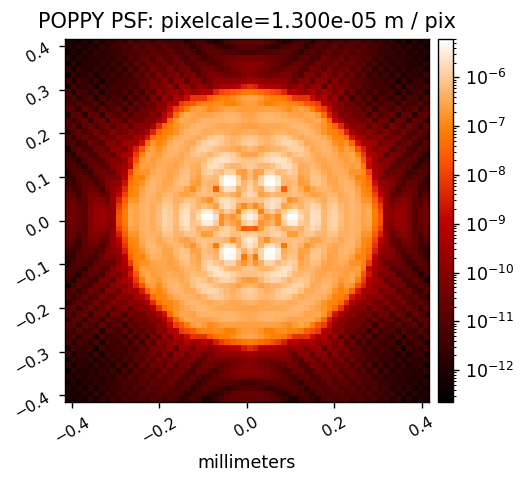

In [10]:
psf_multi = 0
for psf in psfs: psf_multi += psf.data
psf_multi /= len(psfs)

misc.myimshow(psf_multi, 'POPPY PSF: pixelcale={:.3e}'.format(wfs[0][-1].pixelscale),
              pxscl=wfs[0][-1].pixelscale.to(u.mm/u.pix),
              lognorm=True, cmap='gist_heat')

In [43]:
import proper
import roman_phasec_proper

lam_array = np.array([0.575])
lam_array = np.linspace(0.575 - 0.575*.10/2, 0.575 + 0.575*.10/2,7)
# lam_array = np.array([0.59895832])

n = 64                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D
final_sampling = 13e-6  # output sampling in meters

xoffset = 0
use_fpm = 1

use_hlc_dm_patterns = 0
use_errors = 0
use_dm1 = 0
use_dm2 = 0
if use_dm1==0: dm1 = 0
else: dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '\\examples\\hlc_best_contrast_dm1.fits' )
if use_dm2==0: dm2 = 0
else: dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '\\examples\\hlc_best_contrast_dm2.fits' )
polaxis = 0
use_fieldstop = 1
use_pupil_defocus = 0

(proper_wfs, proper_samplings_m) = proper.prop_run_multi('roman_phasec', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'hlc',
                                                           'final_sampling_m':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_errors': use_errors,
                                                           'use_pupil_defocus':use_pupil_defocus,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'use_field_stop':use_fieldstop,
                                                           'polaxis':polaxis,
                                                          })

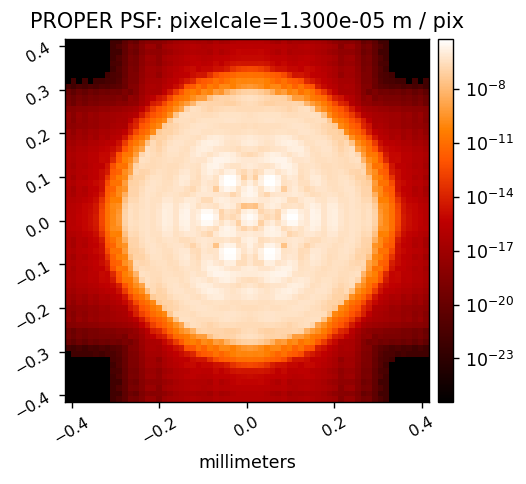

In [44]:
proper_psfs = np.abs(proper_wfs)**2

proper_psf = np.sum( proper_psfs, 0 ) / len(lam_array)
proper_sampling_m = proper_samplings_m[0]*u.m/u.pix

misc.myimshow(proper_psf, 'PROPER PSF: pixelcale={:.3e}'.format(proper_sampling_m),
              pxscl=proper_sampling_m.to(u.mm/u.pix), lognorm=True, cmap='gist_heat')

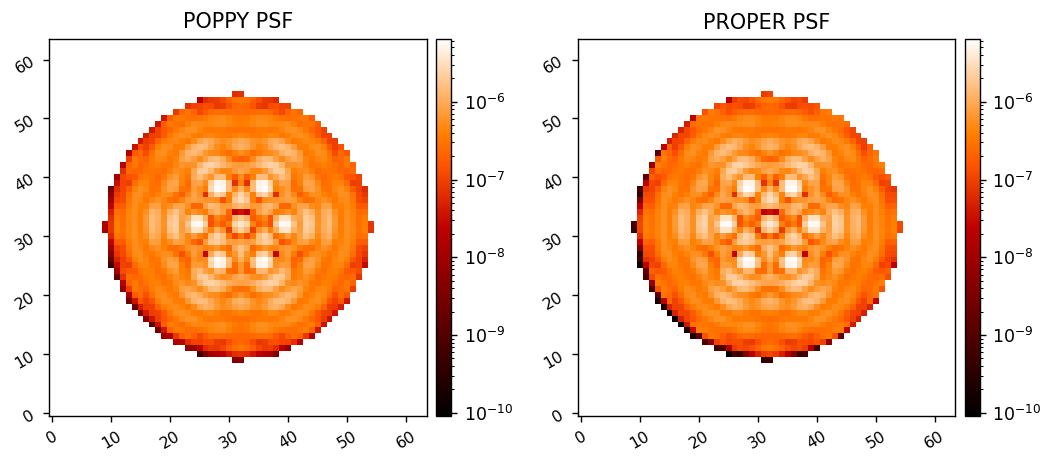

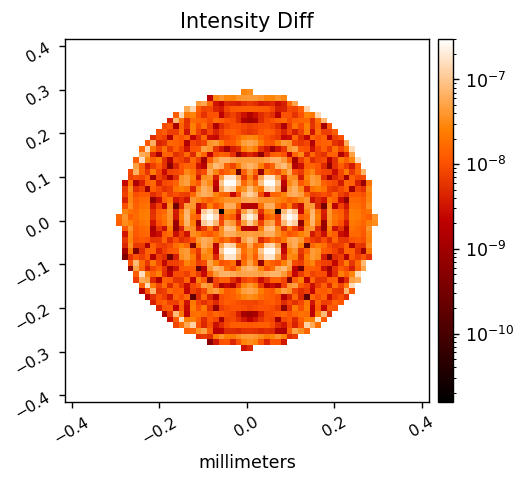

2.4228399603933994e-08 3.6300148520054256e-08
0.0009819984251641042
0.001013106984408986


In [53]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle

pop_int = rotate(psf_multi,180)
pop_int = np.roll(np.roll(pop_int, 1, axis=0), 1, axis=1)
prop_int = proper_psf

iwa=2.7
owa=9.8
# np.roll(np.roll(misc.pad_or_crop(proper_data, 64), -1, axis=0), -1, axis=1)
pop_int = misc.mask_psf(pop_int, pixelscale=pxscl.value, pixelscale_lamD=pxscl_lamD, iwa=None, owa=owa)
prop_int = misc.mask_psf(prop_int, pixelscale=pxscl.value, pixelscale_lamD=pxscl_lamD, iwa=None, owa=owa)

psfs = np.ma.concatenate([pop_int, prop_int])
vmin=np.ma.min(psfs)
vmax=np.ma.max(psfs)
# vmax = 1e-12
# vmin = 1e-18

innwa = iwa/final_sampling*proper_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = owa/final_sampling*proper_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(pop_int, prop_int, 'POPPY PSF', 'PROPER PSF',
               cmap1='gist_heat', cmap2='gist_heat', 
               lognorm1=True, lognorm2=True, vmin1=vmin, vmax1=vmax, vmin2=vmin, vmax2=vmax,
               pxscl=proper_sampling_m.to(u.mm/u.pix),
               patches1=patches1, patches2=patches2)

# Difference
int_diff = np.abs(pop_int-prop_int)
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(int_diff, 'Intensity Diff',
               pxscl=proper_sampling_m.to(u.mm/u.pix),
               lognorm=True, cmap='gist_heat',  patches=patches,)
print(np.ma.mean(int_diff), np.ma.std(int_diff))
print(np.ma.sum(pop_int))
print(np.ma.sum(prop_int))